In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

In [22]:
df=pd.read_csv("transaction.csv")

In [23]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              9999 non-null   float64
 1   distance_from_last_transaction  9999 non-null   float64
 2   ratio_to_median_purchase_price  9999 non-null   float64
 3   repeat_retailer                 9999 non-null   int64  
 4   used_chip                       9999 non-null   int64  
 5   used_pin_number                 9999 non-null   int64  
 6   online_order                    9999 non-null   int64  
 7   fraud                           9999 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [25]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,26.377253,4.807546,1.824213,0.879088,0.350735,0.104810,0.641464,0.084108
std,58.813512,22.261194,2.762572,0.326041,0.477224,0.306324,0.479595,0.277564
min,0.049270,0.000930,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.810070,0.305211,0.489014,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.027137,1.006690,1.005496,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.868282,3.313808,2.091424,1.000000,1.000000,0.000000,1.000000,0.000000
max,2033.498174,990.070315,65.150879,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df.shape

(9999, 8)

In [27]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

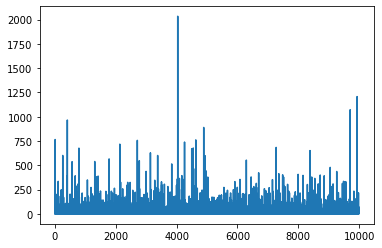

In [28]:
plt.plot(df.distance_from_home)

In [29]:
df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
9994,7.891519,0.142338,0.380634,1,0,0,1,0
9995,4.225100,2.678220,0.556858,1,0,0,1,0
9996,3.614858,0.431593,0.061778,1,0,0,1,0
9997,10.131863,10.262508,2.818090,1,0,0,1,0
9998,16.306236,0.014054,1.904495,1,0,0,1,0


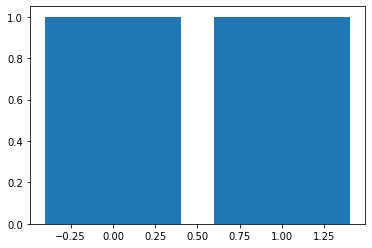

In [30]:
plt.bar(df.used_chip,df.repeat_retailer)
plt.show()

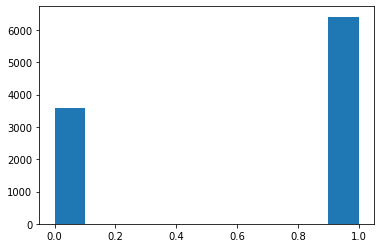

In [31]:
plt.hist(df.online_order)
plt.show()

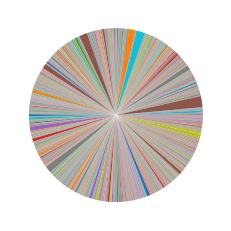

In [32]:
plt.pie(df.distance_from_last_transaction)
plt.show()



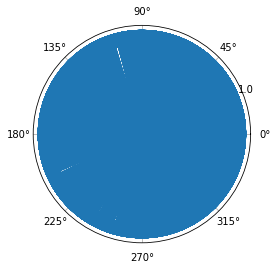

In [33]:
plt.polar(df.repeat_retailer)
plt.show()

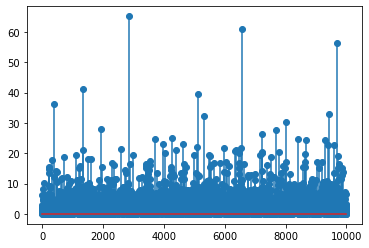

In [34]:
plt.stem(df.ratio_to_median_purchase_price)
plt.show()

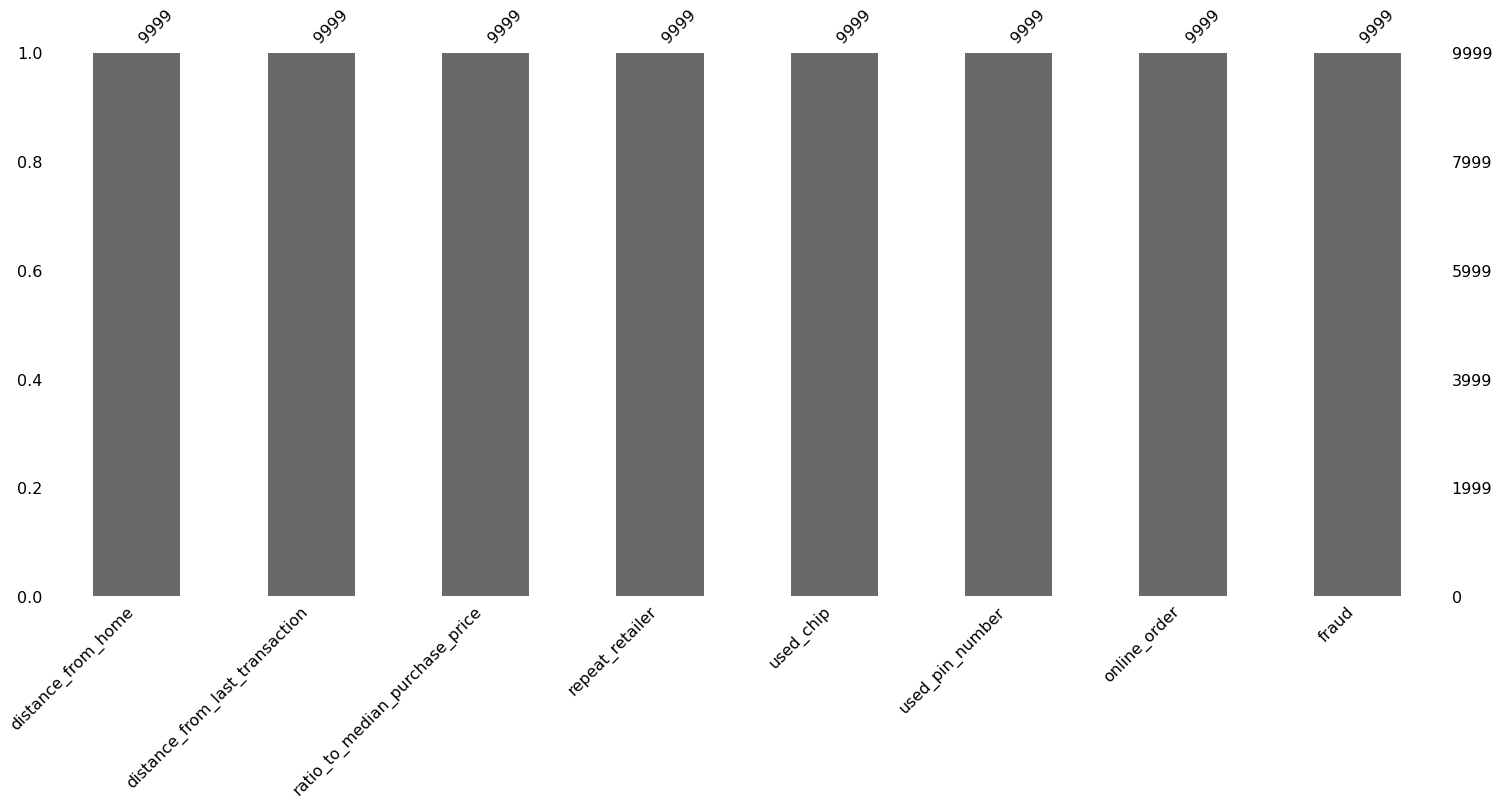

In [35]:
import missingno as msno

msno.bar(df)
plt.show()

In [36]:
X=df.drop('fraud',axis=1)
Y=df['fraud']

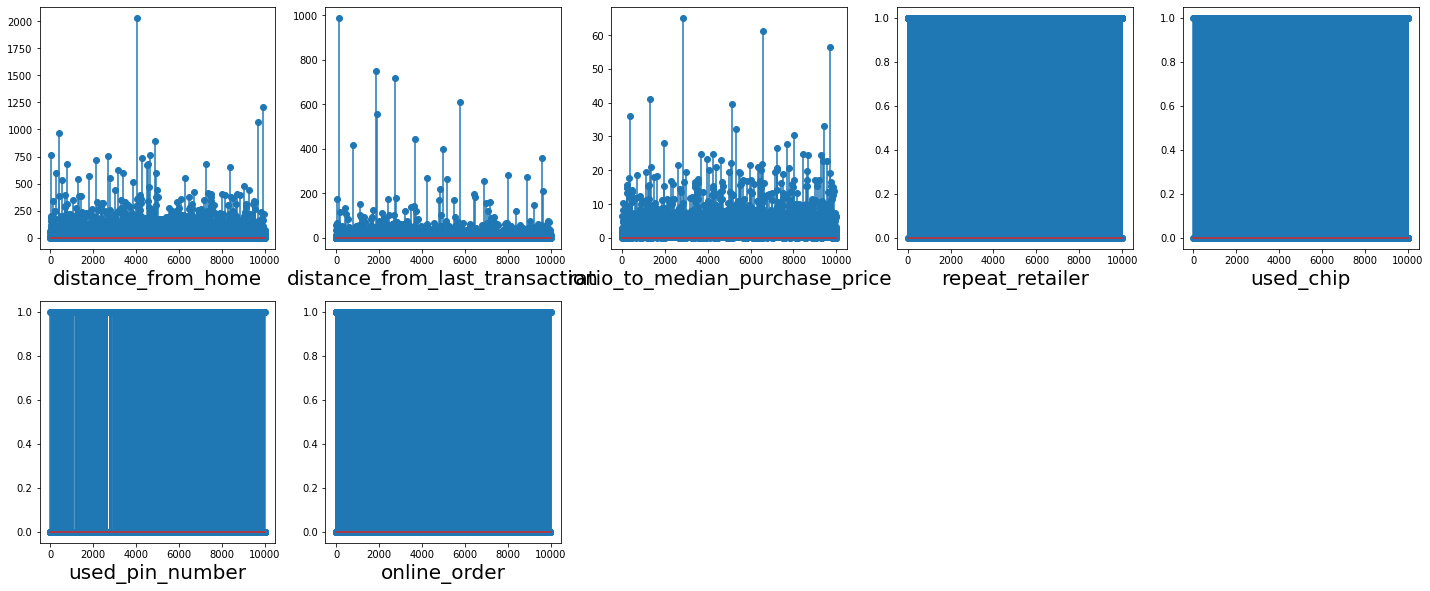

In [37]:
plt.figure(figsize=(20,20))
plotnumber = 1
for col in X.columns:
  if plotnumber<=7:
    ax=plt.subplot(5,5,plotnumber)
    plt.stem(X[col])
    plt.xlabel(col,fontsize =20)
  plotnumber+=1
plt.tight_layout()
plt.show()

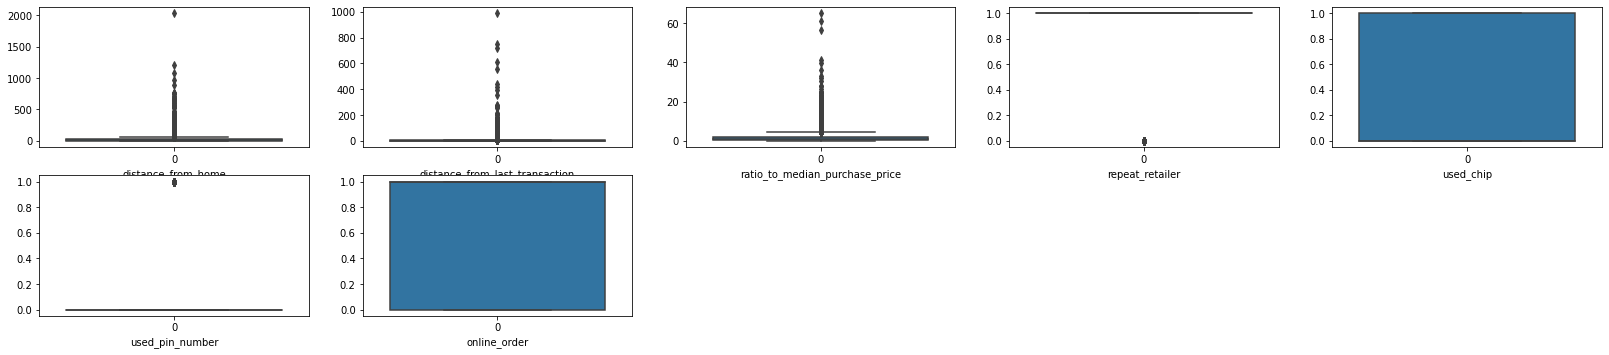

In [38]:
plt.figure(figsize=(28,15))
plotnum=1

for col in X.columns:
  if plotnum<=9:
    ax=plt.subplot(5,5,plotnum)
    sns.boxplot(X[col])
    plt.xlabel(col)
  plotnum+=1
plt.show()

In [39]:
  X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5 ,random_state=0)

In [40]:
a=StandardScaler()
X_train = a.fit_transform(X_train)
X_test = a.transform(X_test)

In [41]:
#Algorithm
clf=DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [42]:
Y_pred=clf.predict(X_test)

In [43]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[4567,    2],
       [  16,  415]])

In [44]:
b = accuracy_score(Y_test,Y_pred)
b

0.9964

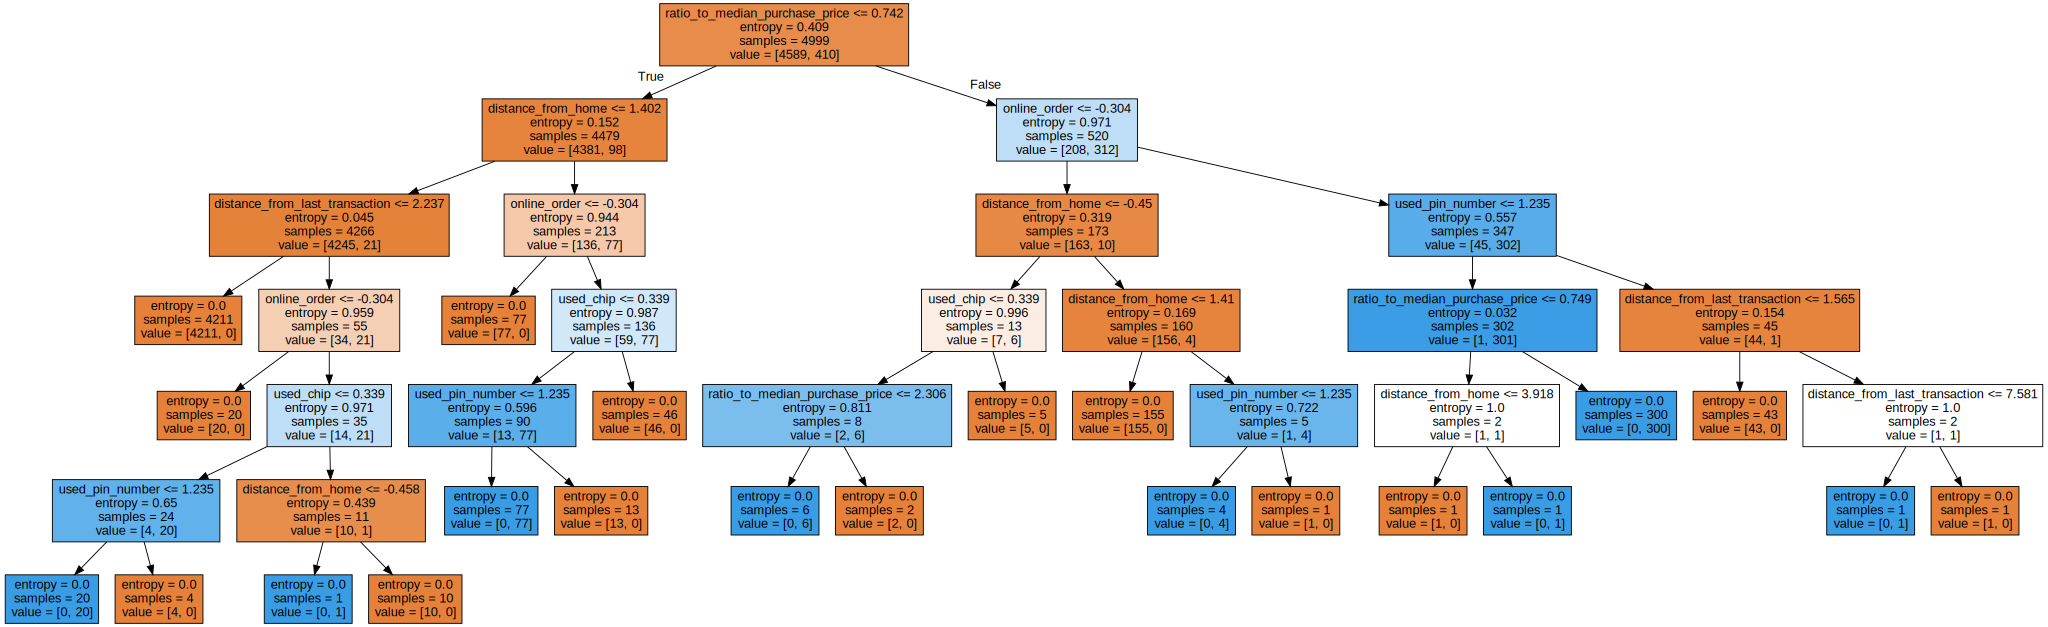

In [45]:
graphviz.Source(export_graphviz(clf,feature_names = X.columns,filled = True))

In [46]:
a = StandardScaler()
X_train = a.fit_transform(X_train)
X_test = a.transform(X_test)

In [47]:
#NAIVE BAYES
clf1 = GaussianNB()

In [48]:

clf1.fit(X_train,Y_train)

GaussianNB()

In [49]:
Y_pred=clf.predict(X_test)

In [50]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[4567,    2],
       [  16,  415]])

In [51]:
accuracy_score(Y_test,Y_pred)

0.9964

In [52]:
clf1 = GaussianNB()

In [53]:
clf1.fit(X_train,Y_train)

GaussianNB()

In [54]:
Y_pred = clf1.predict(X_test)

In [55]:
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[4477,   92],
       [ 197,  234]])

In [56]:
a = accuracy_score(Y_test,Y_pred)
a

0.9422

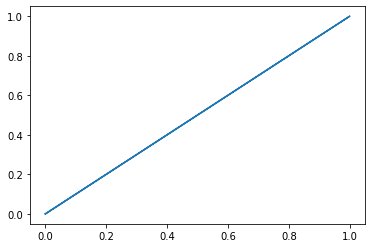

In [57]:
plt.plot(Y_pred,Y_pred)